In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style= 'whitegrid', font_scale=1.3)

## Численное дифференцирование

Задача: написать функцию, которая будет вычислять коэффициенты для численного поиска первой производной с наивысшим возможным порядком аппроксимации. Дан набор узлов, в которых известно значение функции. Считается, что производная вычисляется в точке $x_0$. Узлы подаются относительно этой точки в долях шага h.

Решение: метод неопределенных коэффециентов. Пусть $I$ - множество долей шага h (например, для набора $(x_0 - h, x_0, x_0 + h)$ получаем $I = \{-1, 1\}$). Пусть $A_i$ - коэффициент при $f(x + ih)$. Тогда СЛАУ для нахождения этих коэффициентов:

\begin{equation}
    \sum_{i \in I} A_i + A_0 = 0
\end{equation}

\begin{equation}
    \sum_{i \in I} iA_i = \frac{1}{h}
\end{equation}

\begin{equation}
    \sum_{i \in I} i^2A_i = 0
\end{equation}

\begin{equation}
    \sum_{i \in I} i^3A_i = 0 
\end{equation}

\begin{equation}
    ...
\end{equation}

\begin{equation}
    \sum_{i \in I} i^NA_i = 0 
\end{equation}

Где $N$ - размер $I$. Если принять во втором уравнении $h = 1$, то решения будут как раз в виде коэффециентов, домноженных на шаг $h$.

In [12]:
data = pd.read_csv('errors.txt', header= None, dtype= np.float64)
h = [1 * 0.1 ** i for i in range(16)]
N = [3, 4, 5]
x_data = np.log(h)

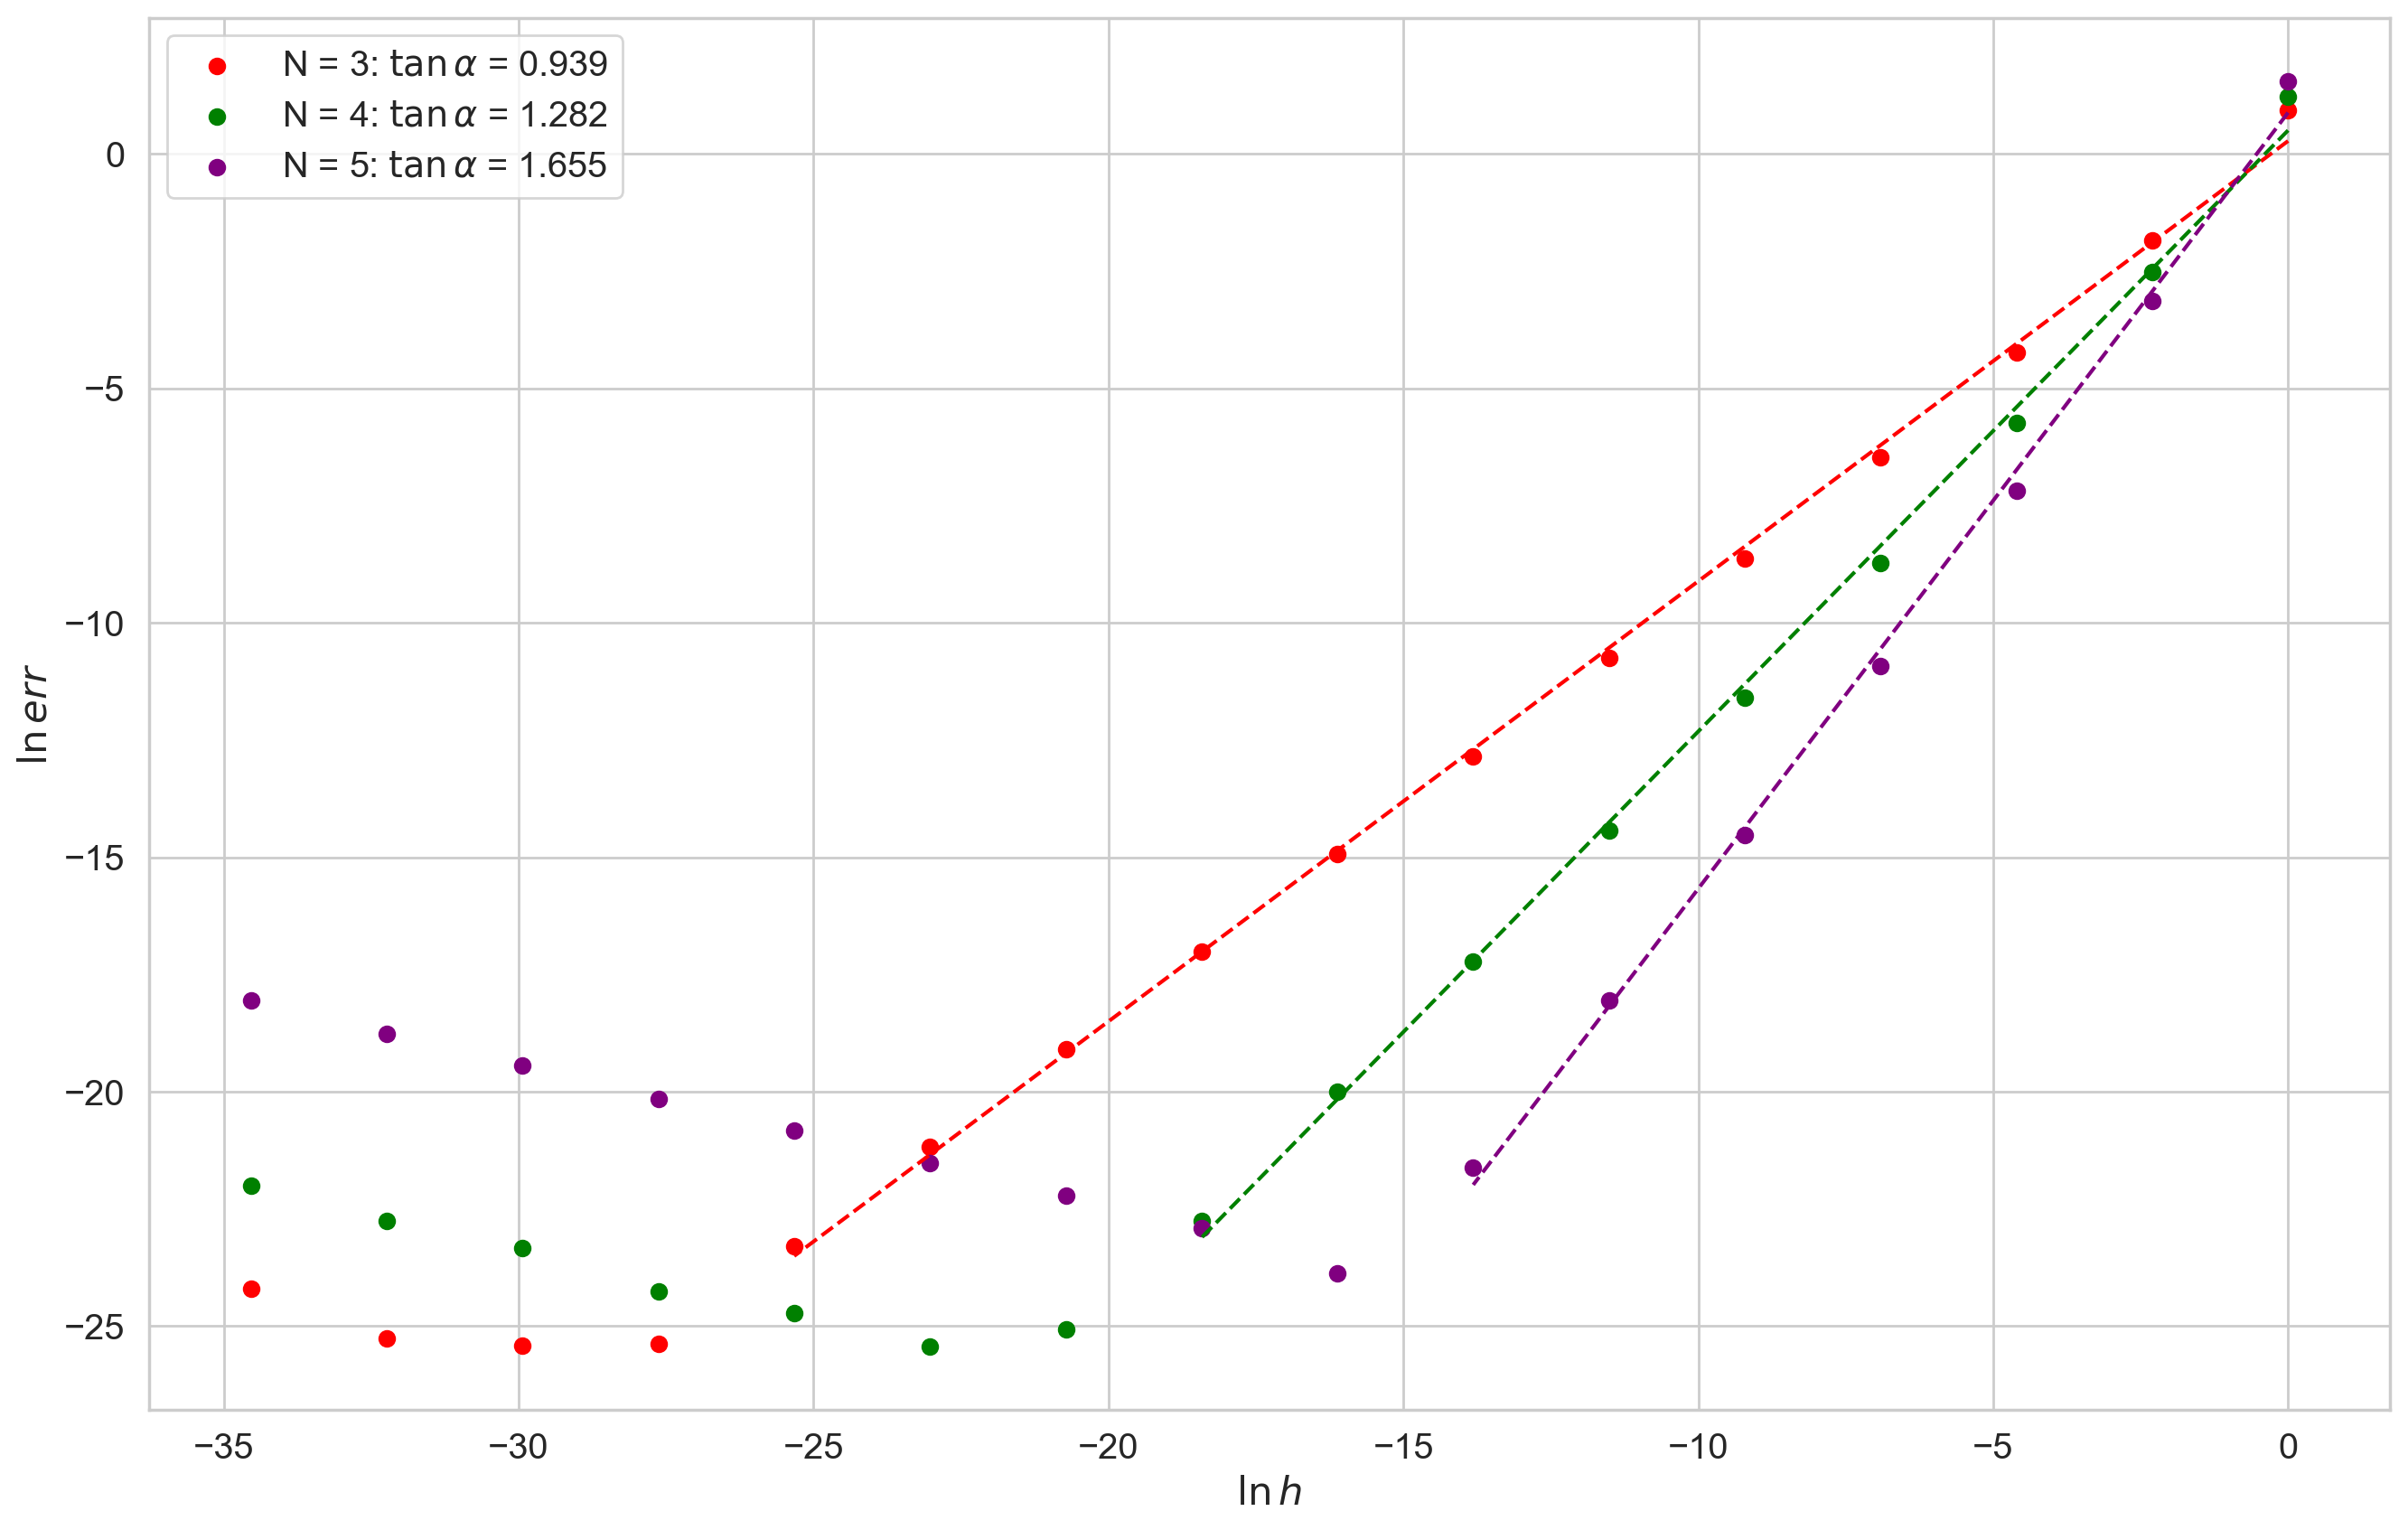

In [13]:
y_data3 = np.log(data.iloc[0, :-1])
y_data4 = np.log(data.iloc[1, :-1])
y_data5 = np.log(data.iloc[2, :-1])

p3 = np.polyfit(x_data[:12], y_data3[:12], 1)
y_3 = np.polyval(p3, x_data[:12])
k3 = p3[0]

p4 = np.polyfit(x_data[:9], y_data4[:9], 1)
y_4 = np.polyval(p4, x_data[:9])
k4 = p4[0]

p5 = np.polyfit(x_data[:7], y_data5[:7], 1)
y_5 = np.polyval(p5, x_data[:7])
k5 = p5[0]


plt.figure(figsize= (16,10), dpi= 200)
plt.scatter(x_data, y_data3, c = 'red', label = f'N = 3: $\\tan \\alpha$ = {k3:.3f}')
plt.plot(x_data[:12], y_3, c = 'red', linestyle = '--')
plt.scatter(x_data, y_data4, c = 'green', label = f'N = 4: $\\tan \\alpha$ = {k4:.3f}')
plt.plot(x_data[:9], y_4, c = 'green', linestyle = '--')
plt.scatter(x_data, y_data5, c = 'purple', label = f'N = 5: $\\tan \\alpha$ = {k5:.3f}')
plt.plot(x_data[:7], y_5, c = 'purple', linestyle = '--')


plt.legend(loc = 'upper left')
plt.xlabel('$\ln h$')
plt.ylabel('$\ln err$')
plt.savefig(f'plot345N')